# Analysis of Pollution in the United States from 2000-2016
#### Brittany Thomas

## Section 1: Background 

### Introduction

Air pollution is a serious issue. According to the World Health Organization, ["one third of deaths from stroke, lung cancer and heart disease are due to air pollution"](https://www.who.int/news-room/spotlight/how-air-pollution-is-destroying-our-health) and ["9 out of 10 people breathe polluted air"](https://www.who.int/news-room/spotlight/how-air-pollution-is-destroying-our-health). A lot of pollution is created through the burning of fossil fuels and with how industrialized our society is, it makes me wonder how polluted this country is and will be in the future. Using data science, we can attempt to figure this out.


The objective of this project is to analyze pollution data of different states between 2000-2016 and attempt to discover relationships and trends between different pollutants and time and regions using various data science techniques. 

### Libraries Used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import tree
import sklearn.model_selection as model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

Some more information about the libraries that will be used in the project: 
- **pandas**: A data manipulation and storage library that I will use it to store my (tabular) data in a dataframe 
- **numpy**: A mathmateical library that I will use to perform various operations on the data 
- **matplotlib**: A plotting library that I will use to graph some data 
- **seaborn**: A data visualization library that I will use for graphing data
- **statsmodels**: A statisical library that I will use to perform ordinary least squares regression 
- **sklearn**: A machine learning library that I will use to perform some predictive modeling of the data

##  Section 2: Data Collection

I knew from the start that I wanted to do a project about air pollution. After doing some research and looking through different data sources, I finally found a csv file from https://data.world/ (https://data.world/data-society/us-air-pollution-data)

The data was taken from information documented by the U.S. EPA (United States Environmental Protection Agency) and is from the time frame of 2000 to 2016. 

To extract the data from the csv file, we can use Panda's read_csv method 

In [2]:
data = pd.read_csv("uspollution_pollution_us_2000_2016.csv")
data.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


The columns are [from the dataset description]: 
- **State Code** : The code allocated by US EPA to each state
- **County code** : The code of counties in a specific state allocated by US EPA
- **Site Num** : The site number in a specific county allocated by US EPA
- **Address**: Address of the monitoring site
- **State** : State of monitoring site
- **County** : County of monitoring site
- **City** : City of the monitoring site
- **Date Local** : Date of monitoring
- **NO2/O3/SO2/CO Units** : The units measured for NO2/O3/SO2/CO
- **NO2/O3/SO2/CO Mean** : The arithmetic mean of concentration of NO2/O3/SO2/CO within a given day
- **NO2/O3/SO2/CO AQI** : The calculated air quality index of NO2/O3/SO2/CO within a given day
- **NO2/O3/SO2/CO 1st Max Value** : The maximum value obtained for NO2/O3/SO2/CO concentration in a given day
- **NO2/O3/SO2/CO 1st Max Hour** : The hour when the maximum NO2/O3/SO2/CO concentration was recorded in a given day

Some helpful additional information about the data: 
- NO2 is Nitrogen dioxide
- O3 is Ozone 
- SO2 is Sulfur dioxide
- CO is Carbon monoxide 
- Parts per million is 1000 times greater than parts per billion (1 ppm = 1000 ppb)
- *The higher the AQI is, the worse the air quality is (i.e. the higher the level of pollution)*

The last statement will be particularly helpful in future analysis

### Data Curation, Parsing and Management

This dataset contains a lot of data and to start off the tidying process, I'm first going to drop the Unnamed:0 column because that is an indexing column, but the dataframe already has an indexing column. 

In [3]:
data = data.drop('Unnamed: 0', axis=1) 

I also want to get rid of any missing data to avoid having to deal with errors relating to NaN when I analyze the data. I'm using the complete case analysis approach (dropping missing values) to deal with it.

This may skew some data and bias the sample because if we look at the first row, we see that there is data associated with the amount of CO in the air, there is just no CO AQI. Using this approach, we get rid of this row entirely. It's unfortunate that we lose this information, however, it is a sacrifice I am willing to make. 

If you are not like me and not willing to make this sacrifice, here are some resources and other methods you can use to handle missing data:
- https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4
- https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html
- https://scikit-learn.org/stable/modules/impute.html


In [4]:
data = data.dropna()

tidy_data_df = data # Making a copy of this dataframe in case I want to use it later at the rawest tidy form 

data.head()

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,1.066667,2.3,0,26.0
9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,38.125000,...,Parts per billion,5.250000,11.0,19,16.0,Parts per million,1.762500,2.5,8,28.0
13,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-04,Parts per billion,40.260870,...,Parts per billion,7.083333,16.0,8,23.0,Parts per million,1.829167,3.0,23,34.0
17,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-05,Parts per billion,48.450000,...,Parts per billion,8.708333,15.0,7,21.0,Parts per million,2.700000,3.7,2,42.0


I now have a tidy dataframe. 

However, there are a few more data transformations I want to do to the dataframe before I start any analysis. 

The first thing I want to do is rename the column headers to remove the spaces, just to ease the process of extracting certain columns in the future. 

In [5]:
data.columns = [c.replace(' ', '_') for c in data.columns]

I also want to see if I could remove the units columns (if they all are the same) and convert them so they all are in the same units. 

In [6]:
data.apply(lambda x: x.nunique())

State_Code              47
County_Code             73
Site_Num               110
Address                204
State                   47
County                 133
City                   144
Date_Local            5996
NO2_Units                1
NO2_Mean             31852
NO2_1st_Max_Value      990
NO2_1st_Max_Hour        24
NO2_AQI                129
O3_Units                 1
O3_Mean               8190
O3_1st_Max_Value       134
O3_1st_Max_Hour         24
O3_AQI                 125
SO2_Units                1
SO2_Mean             10471
SO2_1st_Max_Value      810
SO2_1st_Max_Hour        24
SO2_AQI                140
CO_Units                 1
CO_Mean               3003
CO_1st_Max_Value       111
CO_1st_Max_Hour         24
CO_AQI                 107
dtype: int64

It looks like the units columns contain the same value for all entries, so I'm going to store them in a variable and then drop the columns. 

In [7]:
# Store the units for NO2, O3, SO2 and CO before dropping columns 
NO2_units = data.iloc[0]['NO2_Units']
O3_units = data.iloc[0]['O3_Units']
SO2_units = data.iloc[0]['SO2_Units']
CO_units = data.iloc[0]['CO_Units']

print(NO2_units, " ", O3_units, " ", SO2_units, " ", CO_units)

Parts per billion   Parts per million   Parts per billion   Parts per million


In [8]:
data = data.drop(columns=['NO2_Units', 'O3_Units', 'SO2_Units', 'CO_Units'], axis=1)

To make sure I am accurately representing the data later, I'm going to convert the parts per million values to parts per billion (so I will do this for CO and O3). To do this, simply multiple the original column by 1000.

In [9]:
# Converting the data and making a new column
data['O3_Mean_ppb'] = data['O3_Mean'] * 1000
data['CO_Mean_ppb'] = data['CO_Mean'] * 1000

data['O3_1st_Max_Value_ppb'] = data['O3_1st_Max_Value'] * 1000
data['CO_1st_Max_Value_ppb'] = data['CO_1st_Max_Value'] * 1000

Since AQI is an index (meaning it already is standardized), there is no need for any conversion there. 

In [10]:
data.head()

,State_Code,County_Code,Site_Num,Address,State,County,City,Date_Local,NO2_Mean,NO2_1st_Max_Value,...,SO2_1st_Max_Hour,SO2_AQI,CO_Mean,CO_1st_Max_Value,CO_1st_Max_Hour,CO_AQI,O3_Mean_ppb,CO_Mean_ppb,O3_1st_Max_Value_ppb,CO_1st_Max_Value_ppb
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,...,21,13.0,0.878947,2.2,23,25.0,22.500,878.947,40.0,2200.0
5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,...,22,4.0,1.066667,2.3,0,26.0,13.375,1066.667,32.0,2300.0
9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,38.125000,51.0,...,19,16.0,1.762500,2.5,8,28.0,7.958,1762.500,16.0,2500.0
13,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-04,40.260870,74.0,...,8,23.0,1.829167,3.0,23,34.0,14.167,1829.167,33.0,3000.0
17,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-05,48.450000,61.0,...,7,21.0,2.700000,3.7,2,42.0,6.667,2700.000,12.0,3700.0


Lastly, I want to create a year column, corresponding to the years the data was collected. 

In [11]:
# Extracting a column 
dates = data['Date_Local']
years = []

for index, value in dates.items():
    #The Date_Local column is formatted in such a way that the first 4 digits correspond to the year
    years.append(value[0:4]) 

In [12]:
# Adding a Year column to the data frame
data['Year'] = years
data.head()

,State_Code,County_Code,Site_Num,Address,State,County,City,Date_Local,NO2_Mean,NO2_1st_Max_Value,...,SO2_AQI,CO_Mean,CO_1st_Max_Value,CO_1st_Max_Hour,CO_AQI,O3_Mean_ppb,CO_Mean_ppb,O3_1st_Max_Value_ppb,CO_1st_Max_Value_ppb,Year
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,...,13.0,0.878947,2.2,23,25.0,22.500,878.947,40.0,2200.0,2000
5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,...,4.0,1.066667,2.3,0,26.0,13.375,1066.667,32.0,2300.0,2000
9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,38.125000,51.0,...,16.0,1.762500,2.5,8,28.0,7.958,1762.500,16.0,2500.0,2000
13,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-04,40.260870,74.0,...,23.0,1.829167,3.0,23,34.0,14.167,1829.167,33.0,3000.0,2000
17,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-05,48.450000,61.0,...,21.0,2.700000,3.7,2,42.0,6.667,2700.000,12.0,3700.0,2000


Now, I can finally move on to the analysis. 

## Section 3: Exploratory Data Analysis:

Exploratory Data Analysis, or EDA for short, is the phase in the data science pipeline where we start to look into our data and look at different trends/patterns, interesting statistics and visualizations.  

### Scatter Plot: Pollutant AQI vs Time

With that in mind, the first potential relationship I want to look at is time and the air quality index of the United States. 

Since there is no general AQI (meaning an AQI relating to all of the pollutants combined), I'm going to analyze the relationship between each of the four polluntant's AQI and time. 

I can first make scatter plots for each pollutant and try to observe a trend. I will be using Matplotlib's scatterplot function to do this.

The first pollutant is NO2. 

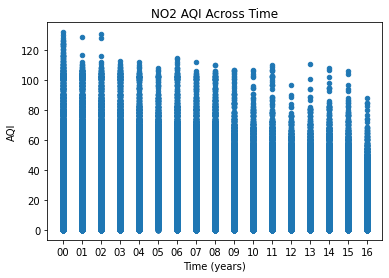

In [13]:
data.plot.scatter(x='Year', y='NO2_AQI')
plt.title("NO2 AQI Across Time")
plt.xlabel("Time (years)")
plt.ylabel("AQI")
# Replacing the x-axis ticks so graph is more readable 
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16'])
plt.show()

This is a very dense graph (there is a lot of data being plotted). However, one can notice a subtle downward decline as time progresses. As time goes on, there are fewer points plotting in the upper region (corresponding to an AQI between 100-120).

How about O3? 

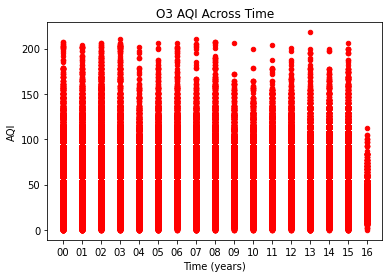

In [14]:
data.plot.scatter(x='Year', y='O3_AQI', color='red')
plt.title("O3 AQI Across Time")
plt.xlabel("Time (years)")
plt.ylabel("AQI")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16'])
plt.show()

Once again, very dense. A pattern is also less noticable for this one. At the start, there seems to be no change in the AQI until around 2009-2010. Then it shoots back up and goes down a bit in 2016. Is this enough to be considered a downward trend? Further analysis needs to be done to say for sure.

Next up is SO2.

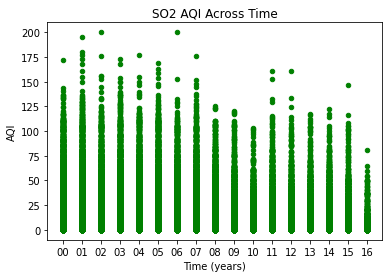

In [15]:
data.plot.scatter(x='Year', y='SO2_AQI', color='green')
plt.title("SO2 AQI Across Time")
plt.xlabel("Time (years)")
plt.ylabel("AQI")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16'])
plt.show()

We see the points are generally decreasing overtime (more points are plotted at lower AQI for later years).

Finally we have CO.

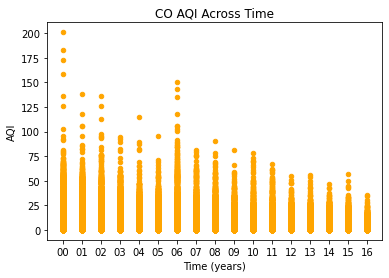

In [16]:
data.plot.scatter(x='Year', y='CO_AQI', color='orange')
plt.title("CO AQI Across Time")
plt.xlabel("Time (years)")
plt.ylabel("AQI")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16'])
plt.show()

There seems to be a wide range for the AQI in 2000. However, the data looks fairly consistent throughout the years and slowly seems to be decreasing.

Some final takeaways from these scatterplots: The AQI for all the pollutants going down (generally) as time passes. O3 also generally had the greatest AQI. 

### Line Plot: Mean AQI vs Times

The next thing I want to analyze is the mean AQI for each pollutant throughout the years to maybe identify a pattern between AQI and time more clearly. 

The pandas library has a really useful feature of grouping (groupby), which will be very helpful in this section 
(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). 

I'm going to groupby the year column I added and take the mean for each pollutant. I need to do this separately for each pollutant and then I will graph them all.

In [17]:
# Grouping by year for mean NO2 AQI
year_vs_NO2_AQI_df = data.groupby('Year').NO2_AQI.mean().reset_index()
year_vs_NO2_AQI_df.head()

,Year,NO2_AQI
0,2000,30.969852
1,2001,31.310673
2,2002,29.363726
3,2003,28.334598
4,2004,26.940324


In [18]:
# Grouping by year for mean 03 AQI
year_vs_O3_AQI_df = data.groupby('Year').O3_AQI.mean().reset_index()
year_vs_O3_AQI_df.head()

,Year,O3_AQI
0,2000,36.022688
1,2001,37.641191
2,2002,39.559160
3,2003,36.631114
4,2004,34.741209


In [19]:
# Grouping by year for mean S02 AQI
year_vs_SO2_AQI_df = data.groupby('Year').SO2_AQI.mean().reset_index()
year_vs_SO2_AQI_df.head()

,Year,SO2_AQI
0,2000,14.260908
1,2001,12.836909
2,2002,11.030905
3,2003,11.328351
4,2004,11.249550


In [20]:
# Grouping by year for mean CO AQI
year_vs_CO_AQI_df = data.groupby('Year').CO_AQI.mean().reset_index()
year_vs_CO_AQI_df.head()

,Year,CO_AQI
0,2000,9.540096
1,2001,8.792393
2,2002,8.486407
3,2003,8.246634
4,2004,7.411070


Now that I got separate dataframes of years and mean AQI for each pollutant, I can use seaborn to plot the lines on a single plot.

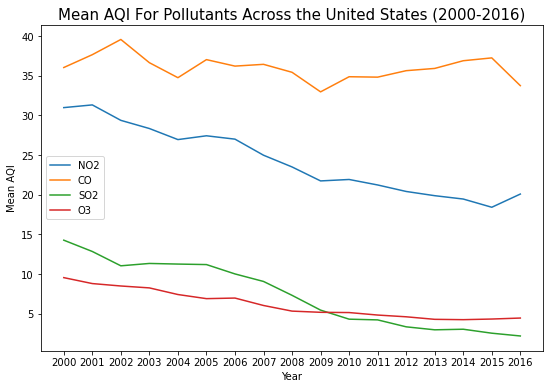

In [21]:
plt.figure(figsize=(9,6)) 
# Adding a title to plot
plt.title('Mean AQI For Pollutants Across the United States (2000-2016)', fontsize=15) 
# Labeling y-axis 
plt.ylabel("Mean AQI") 
# Graphing the lines with year as x component and pollutant mean AQI for y component 
sns.lineplot(x=year_vs_NO2_AQI_df.Year, y=year_vs_NO2_AQI_df.NO2_AQI, ci = None)
sns.lineplot(x=year_vs_O3_AQI_df.Year, y=year_vs_O3_AQI_df.O3_AQI, ci = None)
sns.lineplot(x=year_vs_SO2_AQI_df.Year, y=year_vs_SO2_AQI_df.SO2_AQI, ci = None)
sns.lineplot(x=year_vs_CO_AQI_df.Year, y=year_vs_CO_AQI_df.CO_AQI, ci = None)
plt.legend(['NO2', 'CO', 'SO2', 'O3'])
plt.show()

The mean AQI vs year is fairly consistent with what the scatter plots for each pollutants showed earlier. Each pollutant seems to have a downward trend, albiet with different rates (since the lines aren't parallel). 

Some interesting things to note from this graph is that we see that in later years, the mean AQI for ozone starts to become greater than sulfur dioxide (the lines intersect). This seems to be due to SO2 AQI decreasing a lot quicker than O3 (SO2 has a steeper line). It also is good to note that CO seems to have the highest mean AQI (around 40-35), followed by NO2. 

### Line Plot: Mean Concentration vs Time

Next, I want to see how the mean of each pollutant changes over time. 

The method to do this is the same as above (grouping) and to save time/space, I won't be displaying the results of each groupby, only one.

In [22]:
# NO2 
year_vs_NO2_mean_df = data.groupby('Year').NO2_Mean.mean().reset_index()
# 03 
year_vs_O3_mean_df = data.groupby('Year').O3_Mean_ppb.mean().reset_index()
# SO2
year_vs_SO2_mean_df = data.groupby('Year').SO2_Mean.mean().reset_index()
# C0 
year_vs_CO_mean_df = data.groupby('Year').CO_Mean_ppb.mean().reset_index()
year_vs_CO_mean_df.head()

,Year,CO_Mean_ppb
0,2000,557.789011
1,2001,509.118606
2,2002,500.990409
3,2003,492.719617
4,2004,448.131710


Now that I have the data in an easy to work with form, I'm going to plot all of them as line graphs.

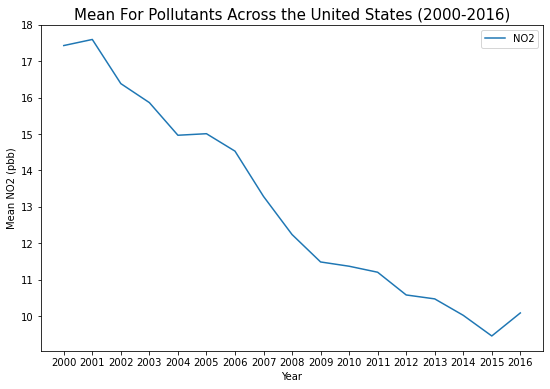

In [23]:
plt.figure(figsize=(9,6))
plt.title('Mean For Pollutants Across the United States (2000-2016)', fontsize=15)
plt.ylabel("Mean NO2 (pbb)")
sns.lineplot(x=year_vs_NO2_mean_df.Year, y=year_vs_NO2_mean_df.NO2_Mean, ci = None)
plt.legend(['NO2'])
plt.show()

The mean concentration of NO2 seems to decline as time passes until 2015, where it is slowly starting to increase again. 

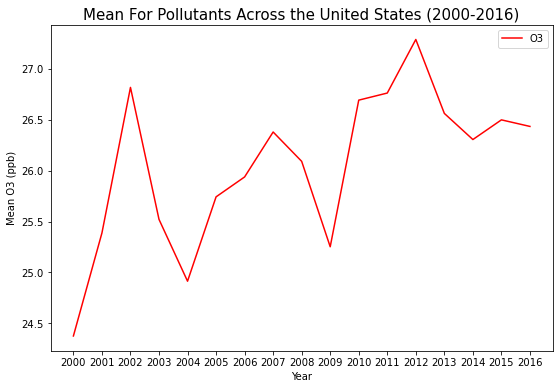

In [24]:
plt.figure(figsize=(9,6))
plt.title('Mean For Pollutants Across the United States (2000-2016)', fontsize=15)
plt.ylabel("Mean O3 (ppb)")
sns.lineplot(x=year_vs_O3_mean_df.Year, y=year_vs_O3_mean_df.O3_Mean_ppb, ci = None, color='red')
plt.legend(['O3'])
plt.show()

The mean concentration of ozone is a bit sporadic. The graph is not very consistent or linear. It increases from 2000 to 2002, but then it makes a decline until 2004, where it starts to increase until 2007. After 2007, there is a decline until 2009, where there is an increase until 2012. Starting from 2012, there is a decrease until 2014. Then an increase to 2015 and then back to a decrease around 2016. However, if there were not lines connected the points (i.e. if this was a scatter plot), you would notice a general increasing trend of the mean concentration of O3. 

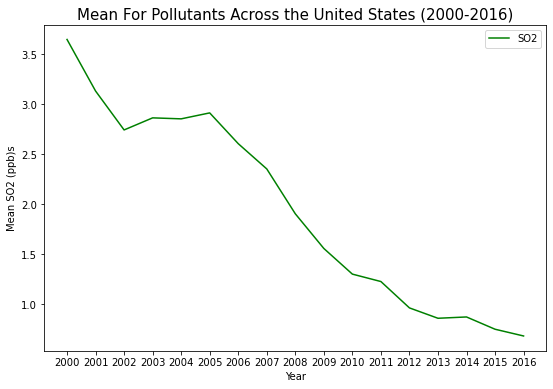

In [25]:
plt.figure(figsize=(9,6))
plt.title('Mean For Pollutants Across the United States (2000-2016)', fontsize=15)
plt.ylabel("Mean SO2 (ppb)s")
sns.lineplot(x=year_vs_SO2_mean_df.Year, y=year_vs_SO2_mean_df.SO2_Mean, ci = None, color='green')
plt.legend(['SO2'])
plt.show()

Back to a more normal looking graph, the mean concentration of SO2 is generally going down. 

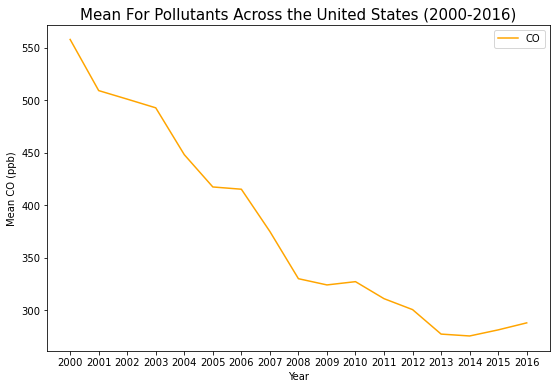

In [26]:
plt.figure(figsize=(9,6))
plt.title('Mean For Pollutants Across the United States (2000-2016)', fontsize=15)
plt.ylabel("Mean CO (ppb)")
sns.lineplot(x=year_vs_CO_mean_df.Year, y=year_vs_CO_mean_df.CO_Mean_ppb, ci = None, color='orange')
plt.legend(['CO'])
plt.show()

Similar to the mean concentration of SO2 and NO2, the mean concentration of CO is going down. However, around 2014, there seems to be the start of an increase.

Apart from O3, the other three pollutants generally had a decrease in mean concentration until around the later years (2014 onwards), where there seems to be the start of an increase. 

### Histogram: Distribution of Max 1st Hour

Next, I want to see the pattern for time of day and the collection of the max concentration of the pollutant.

<AxesSubplot:xlabel='NO2_1st_Max_Hour', ylabel='Count'>

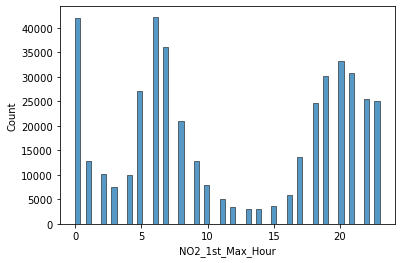

In [27]:
sns.histplot(data=data, x='NO2_1st_Max_Hour')

The max value for NO2 does not seem to have a definite pattern. It seems like the max value can be from the start of the day (hour 0) or early morning (hour 5 to 8) and sometimes night-late night (hour 18-24). 

<AxesSubplot:xlabel='O3_1st_Max_Hour', ylabel='Count'>

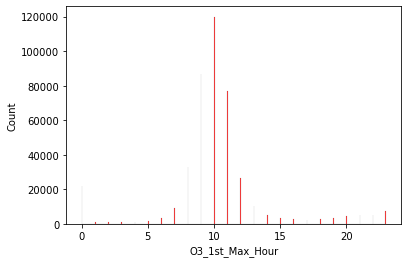

In [28]:
sns.histplot(data=data, x='O3_1st_Max_Hour', color='red')

The max value seems to be always collected around 10 AM to midday. 

<AxesSubplot:xlabel='SO2_1st_Max_Hour', ylabel='Count'>

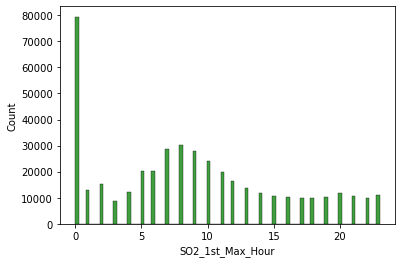

In [29]:
sns.histplot(data=data, x='SO2_1st_Max_Hour', color='green')

The max value is generally associated right when the new day begins. It also is quite frequent that the max value is in the morning (5-10).

<AxesSubplot:xlabel='CO_1st_Max_Hour', ylabel='Count'>

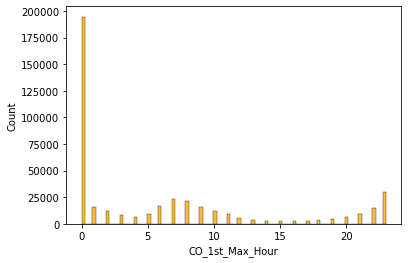

In [30]:
sns.histplot(data=data, x='CO_1st_Max_Hour', color='orange')

The max value seems to always be at the start of the day. 

It's interesting how the max value of each pollutant except ozone is collected at the start of the day. 

Even though the dataset does not include factors that contribute to each pollutant, some research from the EPA can offer some explanation. NO2, SO2 and CO all result from the burning of fossil fuels, so cars, powerplants, heaters can all release these chemicals. Ozone is created when certain pollutants react with sunlight. Knowing that, the max value of ozone being collected is around hour 10 makes sense because that is when the sun is out. 

For more information about the pollutants and how they are formed, check out these resources: 
- https://www.epa.gov/no2-pollution/basic-information-about-no2#What%20is%20NO2
- https://www.epa.gov/ground-level-ozone-pollution/ground-level-ozone-basics#formation
- https://www.epa.gov/so2-pollution/sulfur-dioxide-basics#what%20is%20so2
- https://www.epa.gov/co-pollution/basic-information-about-carbon-monoxide-co-outdoor-air-pollution#What%20is%20CO

### Bar Graph: States vs AQI

My last analysis will be on states and the pollutants. 

Here, I am going to group the data by the state and compare the states with each pollutants mean AQI.

In [31]:
# First grouping by states for NO2
states_vs_aqi_df = data.groupby('State').NO2_AQI.mean().reset_index()
states_vs_aqi_df.head()

,State,NO2_AQI
0,Alabama,21.228900
1,Alaska,19.580972
2,Arizona,36.106818
3,Arkansas,21.487772
4,California,24.114337


In [32]:
# Grouping by states for the rest of the pollutants and then adding the AQI column of each individual dataframe
# as a column to one dataframe 
states_vs_aqi_df['CO_AQI'] = data.groupby('State').CO_AQI.mean().reset_index()['CO_AQI']
states_vs_aqi_df['SO2_AQI'] = data.groupby('State').SO2_AQI.mean().reset_index()['SO2_AQI']
states_vs_aqi_df['O3_AQI'] = data.groupby('State').O3_AQI.mean().reset_index()['O3_AQI']
states_vs_aqi_df.head()

,State,NO2_AQI,CO_AQI,SO2_AQI,O3_AQI
0,Alabama,21.228900,3.851662,7.005115,36.831202
1,Alaska,19.580972,6.528340,14.506073,17.712551
2,Arizona,36.106818,9.190681,4.212319,39.004980
3,Arkansas,21.487772,5.929914,2.975883,35.035213
4,California,24.114337,7.405755,3.598922,35.721988


I now have one dataframe that contains the mean AQI for the four pollutants, grouped by states. 

In order to graph this, I need to tidy this dataframe a bit. I need to unpivot my data and to do that, I'll use pandas melt(). 

In [33]:
tidy_df = pd.melt(states_vs_aqi_df, id_vars="State", var_name="Pollutant", value_name="Mean_AQI")
tidy_df.head()

,State,Pollutant,Mean_AQI
0,Alabama,NO2_AQI,21.228900
1,Alaska,NO2_AQI,19.580972
2,Arizona,NO2_AQI,36.106818
3,Arkansas,NO2_AQI,21.487772
4,California,NO2_AQI,24.114337


Now I have a tidy dataframe that I can plot with. I'm going to make a bar graph to analyze the relationship between states and pollutants.

<AxesSubplot:xlabel='Mean_AQI', ylabel='State'>

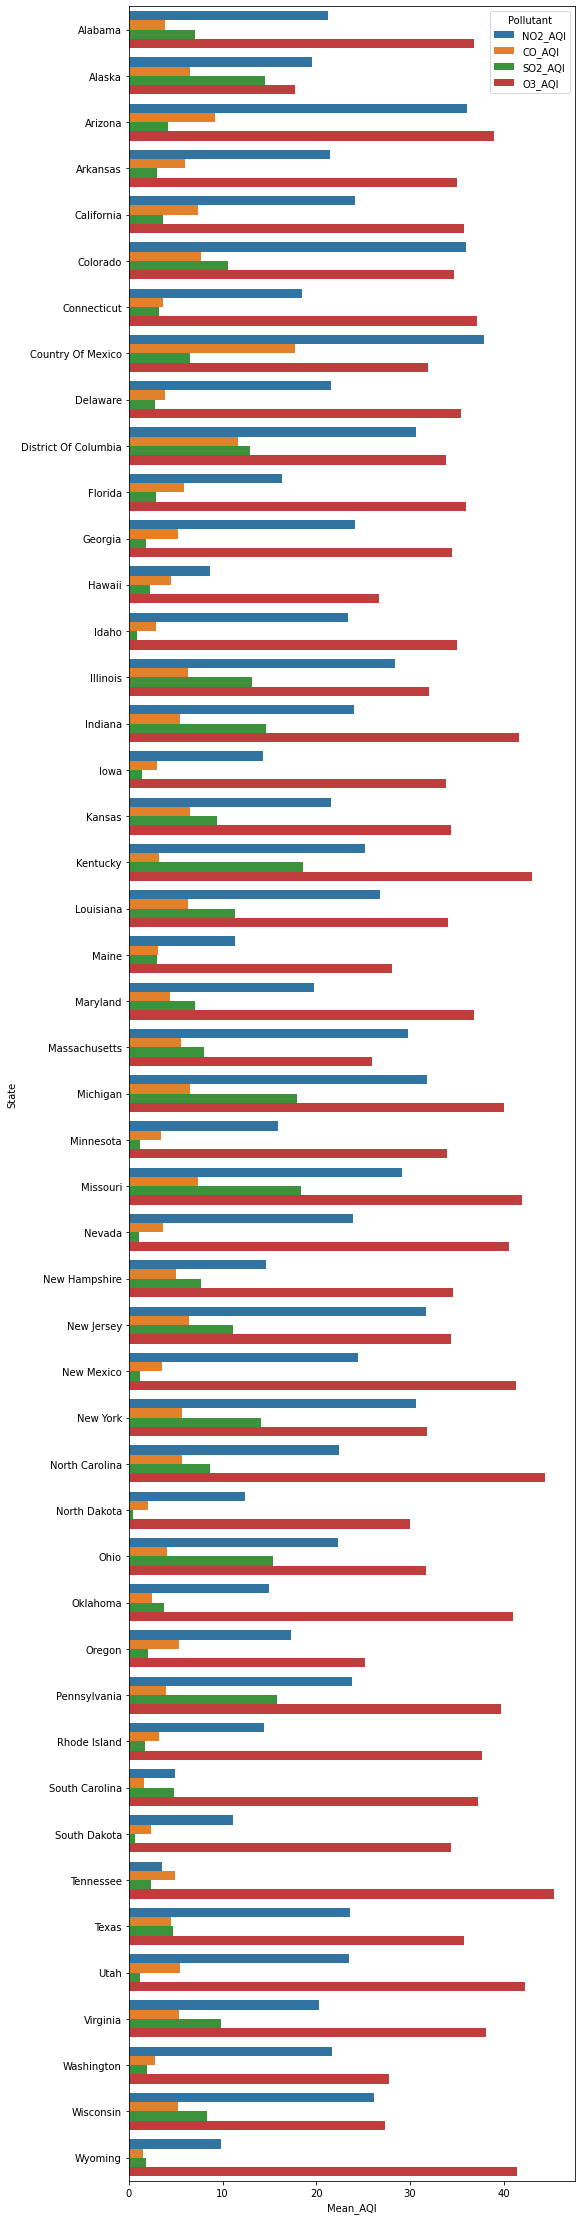

In [34]:
plt.figure(figsize=(8,40))
sns.barplot(x='Mean_AQI', y='State', hue='Pollutant', data=tidy_df)

We can see that Ozone's mean AQI is pretty much the greatest one (with a few exceptions like Colorado where NO2 is slightly greater). NO2 and O3 seem to be the pollutants with the greatest AQI for each state while CO and SO2 have a lesser AQI. 

Some notable states include Tennesse, Wyoming, New York and California. It is shocking that more urban and populated states like New York and California have a more even distribution of pollutant AQI while Tennessee and Wyoming have pretty low AQI for everything but Ozone, which is super large. 

## Section 4: Hypothesis Testing and Machine Learning

Before I get into the major hypothesis testing, I want to fit a linear regression model to time vs O3 AQI to see if there is a relationship (beyond what the graphs from above tell us). 

In [35]:
# Extracting AQI By Year for O3
year_vs_O3_AQI_df = data.groupby('Year').O3_AQI.apply(list).reset_index()
year_vs_O3_AQI_df.head()

,Year,O3_AQI
0,2000,"[34, 27, 14, 28, 10, 21, 20, 17, 19, 13, 14, 1..."
1,2001,"[14, 11, 26, 24, 8, 10, 19, 18, 13, 14, 24, 22..."
2,2002,"[18, 19, 19, 16, 19, 11, 4, 7, 5, 10, 25, 18, ..."
3,2003,"[19, 25, 19, 14, 14, 21, 28, 8, 13, 9, 19, 18,..."
4,2004,"[21, 20, 25, 21, 8, 12, 3, 5, 13, 26, 22, 20, ..."


In [36]:
# Extracting the information from the dataframe 
values = year_vs_O3_AQI_df.values.tolist()
years = [int(year[0]) for year in values]
# Converting the years into a 2d array so I can use Sklearn's model 
year = np.array([[y] for y in years]) 
year

array([[2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016]])

In [37]:
# Extracting the O3_AQI from the dataframe
O3_AQI_per_year = [aqi[1] for aqi in values]

In order to use sklearn's linear model, I need to make sure that all the data is the same size.

Spoiler alert: it's not. 

The AQI for each year is not the same size. So I need to handle this case and make them all the same size.

In [38]:
# Figuring out which list has the greatest amount of entries
max_list_length = 0
for sub_list in O3_AQI_per_year:
    #print(len(sub_list))
    if (len(sub_list)) > max_list_length:
        max_list_length = len(sub_list)
        
print("Max:", max_list_length)

Max: 33660


In [39]:
# Padding the arrays with the mean (imputation)
imputated_O3_AQI_per_year = []
for sub_list in O3_AQI_per_year:
    if (len(sub_list)) < max_list_length: 
        new_list = np.pad(sub_list, (0, max_list_length - len(sub_list)), 'mean')
        imputated_O3_AQI_per_year.append(new_list)
    else: 
        imputated_O3_AQI_per_year.append(sub_list)

The method I used was mean single imputation. I padded the arrays with the mean for that set. This can introduce bias and does not deal with noise well. There are other methods you can use to impute the data (the resources linked above for handling missing values).

Now that the data is the same size, I can fit a linear model for O3. 

In [40]:
reg = linear_model.LinearRegression()

In [41]:
# Fitting the data 
reg.fit(year, imputated_O3_AQI_per_year)

LinearRegression()

In [42]:
# Taking the average of the coefficient and intercept so I can write a formula
m = np.average(reg.coef_)
b = np.average(reg.intercept_)

print(m, b)

-0.12429973029021478 285.60918294828326


The linear regression line formula is y = -0.124x + 285.609.

This means that O3 AQI is decreasing around .124 each year. 

We can use this model to predict what the mean ozone AQI will be in the future. 

In [43]:
np.mean(reg.predict([[2022]]))

34.27512830146913

This model predicts that the mean ozone AQI for next year will be around 34. 

We can also see what it will be 31 years from now. 

In [44]:
np.mean(reg.predict([[2052]]))

30.54613639276269

Now that I've done this, I'm going to use this method (linear regression) for hypothesis testing. 

### Hypothesis testing

In section 3, we first looked at years vs AQI. Based off the graph, I made the assumption that there is a relationship between AQI and time. 

However, to formally reject a null hypothesis of no relationship between time and AQI, I can use a linear regression model to test the relationship.

Using the statsmodel library, I don't need to impute the data to do the regression models. 

In [45]:
X1 = data['Year'] # Setting year as X value 
y1 = data['NO2_AQI'] # Setting the AQI as the y value 
X1 = sm.add_constant(X1) # Adding a constant of 1 to the data 
est1 = sm.OLS(y1, X1.astype(float)) # Creating the regression model
est1_v2 = est1.fit() # Fitting it 
print(est1_v2.summary()) # Printing the summary 

                            OLS Regression Results                            
Dep. Variable:                NO2_AQI   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                 3.319e+04
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:29:41   Log-Likelihood:            -1.7917e+06
No. Observations:              436876   AIC:                         3.583e+06
Df Residuals:                  436874   BIC:                         3.583e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1762.9637      9.545    184.698      0.0

In [46]:
print(est1_v2.f_pvalue)

0.0


Looking at the p-value for this model, we see that it is very small (0) so we can say that the data is statistically significant. In other words, we can reject the null hypothesis of no relationship for time vs NO2 AQI. We can also see that NO2 AQI decreases by 0.8659 each year. 

We need to repeat this process for the other 3 pollutants as well.

In [47]:
X2 = data['Year']
y2 = data['SO2_AQI']
X2 = sm.add_constant(X2)
est2 = sm.OLS(y2, X2.astype(float))
est2_v2 = est2.fit()
print(est2_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                SO2_AQI   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                 4.926e+04
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:29:44   Log-Likelihood:            -1.6799e+06
No. Observations:              436876   AIC:                         3.360e+06
Df Residuals:                  436874   BIC:                         3.360e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1647.3597      7.390    222.912      0.0

In [48]:
print(est2_v2.f_pvalue)

0.0


Once again the p-value is small, so we can reject the null hypothesis of no relationship for SO2. SO2 AQI also seems to decrease by 0.8167 each year. 

The next case we are looking at is O3. We did a regression model with sklearn's linear regression earlier. However, I'm going to repeat that case here using statsmodel to look at the p-value. 

There will be a slight difference in the regression equation here since I did not have to impute the data. 

In [49]:
X3 = data['Year']
y3 = data['O3_AQI']
X3 = sm.add_constant(X3)
est3 = sm.OLS(y3, X3.astype(float))
est3_v2 = est3.fit()
print(est3_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                 O3_AQI   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     173.5
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           1.32e-39
Time:                        16:29:47   Log-Likelihood:            -1.9237e+06
No. Observations:              436876   AIC:                         3.847e+06
Df Residuals:                  436874   BIC:                         3.847e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        206.1069     12.912     15.962      0.0

In [50]:
print(est3_v2.f_pvalue)

1.324539849889709e-39


This p-value is less that 0.05 so we can say that we reject the null hypothesis. 

We can use the const and year value from this model to predict what the O3 AQI will be in 2022 (like we did above). 

In [51]:
(-0.0847*2022)+206.1069  

34.843500000000006

This is the predicted value for 2022 and it's not too far off from the sklearn linear regression model.

Finally, we can check CO. 

In [52]:
X4 = data['Year']
y4 = data['CO_AQI']
X4 = sm.add_constant(X4)
est4 = sm.OLS(y4, X4.astype(float))
est4_v2 = est4.fit()
print(est4_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                 CO_AQI   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                 3.745e+04
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:29:55   Log-Likelihood:            -1.3738e+06
No. Observations:              436876   AIC:                         2.748e+06
Df Residuals:                  436874   BIC:                         2.748e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        715.5959      3.667    195.152      0.0

In [53]:
print(est4_v2.f_pvalue)

0.0


We have a small p-value so we reject the null hypothesis and CO AQI seems to decrease by 0.3533 each year. 

One thing to note is that in the notes for all these models, it mentions that there can be a strong multicollinearity. This suggests we can make better models by adding interaction terms or using a nonlinear transformation of the predictors for the model (example, increase the degree to 2 (use polynomial features)). I recommend cutting down the size of the data when attempting to do interaction terms because it sometimes can kill the kernal for a jupyter notebook (due to memory issues). 

For more information about hypothesis testing, check out these sites:
- https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/support-or-reject-null-hypothesis/
- https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

### Machine Learning: Decision Tree Classifier 

I want to make a model that will attempt to predict the state that corresponds to given pollutant information (e.g. given NO2 mean). A good machine learning algorithm for classification is a decision tree classifier. 

For this machine learning model, I'm going to go back to the rawest tidy dataset I had (the one I stored earlier). I don't want to use the dataframe with all my transformations and added columns.

In [54]:
tidy_data_df.head()

,State_Code,County_Code,Site_Num,Address,State,County,City,Date_Local,NO2_Units,NO2_Mean,...,SO2_Units,SO2_Mean,SO2_1st_Max_Value,SO2_1st_Max_Hour,SO2_AQI,CO_Units,CO_Mean,CO_1st_Max_Value,CO_1st_Max_Hour,CO_AQI
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,1.066667,2.3,0,26.0
9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,38.125000,...,Parts per billion,5.250000,11.0,19,16.0,Parts per million,1.762500,2.5,8,28.0
13,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-04,Parts per billion,40.260870,...,Parts per billion,7.083333,16.0,8,23.0,Parts per million,1.829167,3.0,23,34.0
17,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-05,Parts per billion,48.450000,...,Parts per billion,8.708333,15.0,7,21.0,Parts per million,2.700000,3.7,2,42.0


I have a lot of categorical (non-numeric) data that I will need to convert into numericals to create this model. I'm going to use Sklearn's label encoder (check out this [user guide](https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets) ) to do this. 

In [55]:
# Convert categorical data into numerical data
label_encoder = LabelEncoder()

# I need to include Date_Local due to the format of the date
categorical_data = ['Address', 'State','County', 'City', 'NO2_Units', 'O3_Units', 'SO2_Units', 'CO_Units', 'Date_Local']

# Transforming the categorical data into numerics
for name in categorical_data:
    tidy_data_df[name] = label_encoder.fit_transform(tidy_data_df[name])

We can now see the transformed data.

In [56]:
tidy_data_df.head()

,State_Code,County_Code,Site_Num,Address,State,County,City,Date_Local,NO2_Units,NO2_Mean,...,SO2_Units,SO2_Mean,SO2_1st_Max_Value,SO2_1st_Max_Hour,SO2_AQI,CO_Units,CO_Mean,CO_1st_Max_Value,CO_1st_Max_Hour,CO_AQI
1,4,13,3002,36,2,74,98,0,0,19.041667,...,0,3.000000,9.0,21,13.0,0,0.878947,2.2,23,25.0
5,4,13,3002,36,2,74,98,1,0,22.958333,...,0,1.958333,3.0,22,4.0,0,1.066667,2.3,0,26.0
9,4,13,3002,36,2,74,98,2,0,38.125000,...,0,5.250000,11.0,19,16.0,0,1.762500,2.5,8,28.0
13,4,13,3002,36,2,74,98,3,0,40.260870,...,0,7.083333,16.0,8,23.0,0,1.829167,3.0,23,34.0
17,4,13,3002,36,2,74,98,4,0,48.450000,...,0,8.708333,15.0,7,21.0,0,2.700000,3.7,2,42.0


For this model my feature targets are the states. 

For X, I need to drop the state code, address, county, city, county code and site num in addition to the targets because I want to classify purely off of the pollutant data. If I don't drop this, the model would use that to classify and that would defeat the purpose because the state code corresponds to a specific state. I would get an accuracy of 1 with that model, which is not correct nor ideal.

In [57]:
y = tidy_data_df['State']
X = tidy_data_df.drop(['State', 'State_Code', 'Address','County', 'City', 'County_Code', 'Site_Num'], axis=1)

I'm going to use holdout validation to test my model so I need to split the data first. 

In [58]:
# Splitting data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

I'm using sklearn's GridSearchCV to determine my hyperparameters. GridsearchCV is a method for hyperparameter tuning. Check out this [resource](https://scikit-learn.org/stable/modules/grid_search.html) for more information about this procedure. 

In [59]:
dec_tree = tree.DecisionTreeClassifier()

In [60]:
# Hyperparameters I need to choose
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = [2,3,4,5,6,7,8,9,10,12,14,16,18,20,24,28]

In [61]:
hyperparameters = dict(criterion=criterion, splitter=splitter, max_depth=max_depth)

In [62]:
# Choosing the best hyperparameters and fitting the model
clf_GS = GridSearchCV(dec_tree, hyperparameters)

In [63]:
clf_GS.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16,
                                       18, 20, 24, 28],
                         'splitter': ['best', 'random']})

The hyperparameters I chose for this model are the following. 

In [64]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best Splitter:', clf_GS.best_estimator_.get_params()['splitter'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])

Best Criterion: entropy
Best Splitter: best
Best max_depth: 14


I can now check the accuracy of the model by using my testing data. 

In [65]:
accuracy_decision_tree = clf_GS.best_estimator_.score(X_test, y_test)
accuracy_decision_tree

0.4759702982081872

Ouch. That accuracy is not very good. 

But, this result was sort-of expected. Looking back to the states and pollutant mean bar graph from section 3, we see that the amount of each pollutant for each state doesn't differ by much and they all have similar patterns- for example, 03 generally is the most abundant for all states. It would be hard to distinguish which state is what with such similar data.

## Section 5: Conclusion

### Insights and Policy Decision

From the data we analyzed, we seem to be on a good trend in that air pollution seems to be decreasing, indicated by the general decrease in mean AQI for each pollutant. 

However, this doesn't mean that we should stop trying to reduce pollution. We especially need to focus on lowering our ozone pollution because that dominates greatly for many states compared to the other three. From our linear models, we also see that ozone AQI is decreasing by the least amount compared to the other three pollutants. 

If we as a society keep making good decisions, like carpooling to reduce the burning of fossil fuels, we can maintain a healthy environment to live in. We only have one planet to live on so it's important that we take care of it.

Click [here](https://www.aqi.in/blog/10-best-ways-to-reduce-air-pollution/) and [here](https://www3.epa.gov/region1/airquality/reducepollution.html) to find out about some easy ways you can reduce air pollution. 